# EDA

## Load in Necessary Libraries to EDA Jupyter Notebook

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [61]:
TENORS = ['1MO','3MO','6MO','1Y','2Y','3Y','5Y','7Y','10Y','20Y','30Y']
df = pd.read_csv("../data/processed/cleaned_data.csv", parse_dates=['date'])
df = df.set_index('date')
df.head()

,1MO,3MO,6MO,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
date,,,,,,,,,,,
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53
2001-08-02,3.65,3.53,3.46,3.57,3.89,4.17,4.69,4.97,5.17,5.68,5.57
2001-08-03,3.63,3.52,3.47,3.57,3.91,4.22,4.72,4.99,5.20,5.70,5.59
2001-08-06,3.62,3.52,3.47,3.56,3.88,4.17,4.71,4.99,5.19,5.70,5.59


Yields appear to be importing correctly as percentages.

## Data Exploration

In [62]:
print("=== Basic Info ===")
df.info()
print("=== Descriptive Stats ===")
display(df.describe().T)
print("=== Missing Values ===")
display(df.isna().sum())


=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6073 entries, 2001-07-31 to 2025-11-12
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1MO     6073 non-null   float64
 1   3MO     6073 non-null   float64
 2   6MO     6073 non-null   float64
 3   1Y      6073 non-null   float64
 4   2Y      6073 non-null   float64
 5   3Y      6073 non-null   float64
 6   5Y      6073 non-null   float64
 7   7Y      6073 non-null   float64
 8   10Y     6073 non-null   float64
 9   20Y     6073 non-null   float64
 10  30Y     6073 non-null   float64
dtypes: float64(11)
memory usage: 569.3 KB
=== Descriptive Stats ===


,count,mean,std,min,25%,50%,75%,max
1MO,6073.0,1.651037,1.831347,0.00,0.07,0.97,2.60,6.02
3MO,6073.0,1.711521,1.841122,0.00,0.10,1.05,2.87,5.63
6MO,6073.0,1.804010,1.827889,0.02,0.15,1.18,3.15,5.61
1Y,6073.0,1.874072,1.742109,0.04,0.26,1.34,3.28,5.49
2Y,6073.0,2.038343,1.584971,0.09,0.61,1.63,3.48,5.29
3Y,6073.0,2.214352,1.474554,0.10,0.93,1.87,3.62,5.26
5Y,6073.0,2.580680,1.321835,0.19,1.51,2.48,3.80,5.23
7Y,6073.0,2.888348,1.230935,0.36,1.91,2.88,3.97,5.29
10Y,6073.0,3.161510,1.172931,0.52,2.18,3.18,4.20,5.44
20Y,6073.0,3.685217,1.196235,0.87,2.66,3.86,4.73,6.05


=== Missing Values ===


1MO    0
3MO    0
6MO    0
1Y     0
2Y     0
3Y     0
5Y     0
7Y     0
10Y    0
20Y    0
30Y    0
dtype: int64

Descriptive statistics appear reasonable and NA count appears consistent with prior data cleaning steps.

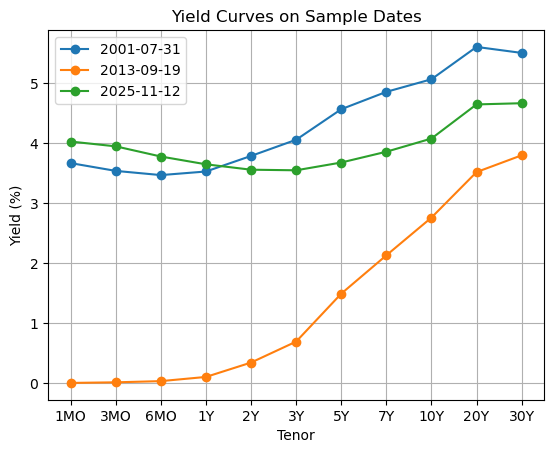

In [63]:
sample_dates = [df.index[0], df.index[len(df)//2], df.index[-1]]

for date in sample_dates:
    plt.plot(TENORS, df.loc[date, TENORS], marker='o', label=date.strftime('%Y-%m-%d'))
    
plt.title('Yield Curves on Sample Dates')
plt.xlabel('Tenor')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid()
plt.show()

Yield curves appear normal with typical upward slope. No anomalies detected on sample dates.

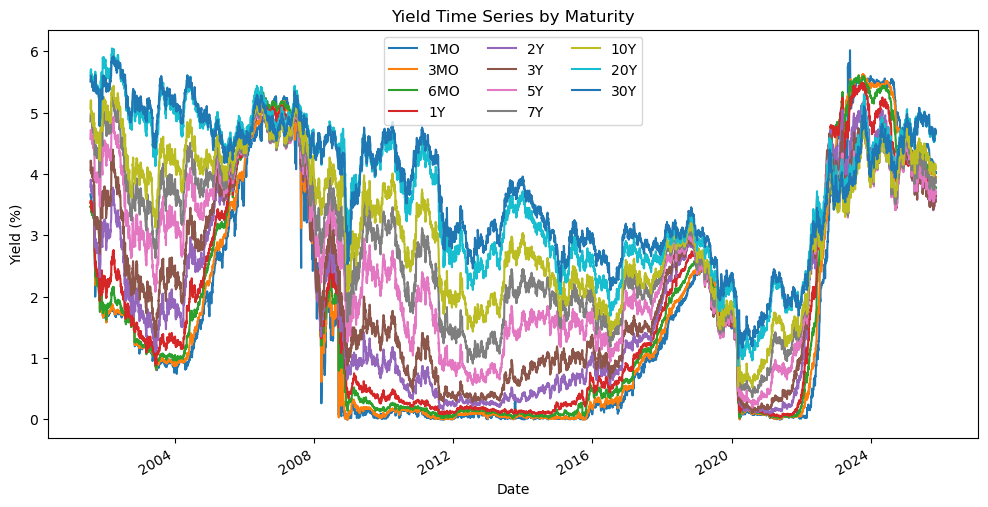

In [64]:
df[TENORS].plot(figsize=(12,6))
plt.title("Yield Time Series by Maturity")
plt.ylabel("Yield (%)")
plt.xlabel("Date")
plt.legend(ncol=3)
plt.show()

Yields across time are difficult to track in this plot format but overall, appear to be reasonable. Spreads between yields appear to increase and decrease over time with yields appearing to typically be increasing across maturities, which is typical.

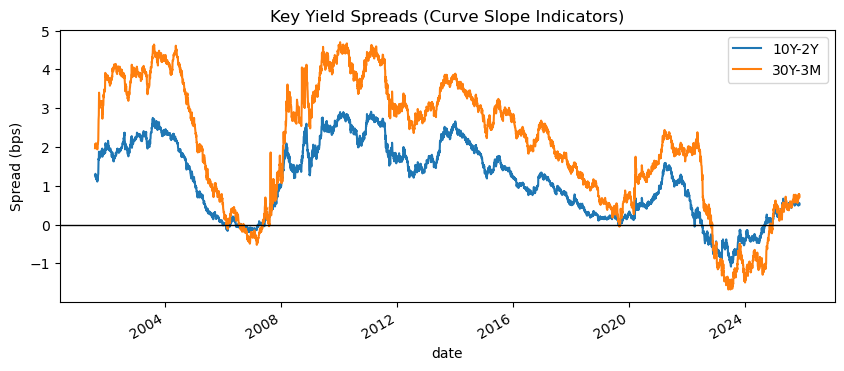

In [65]:
df['10Y-2Y'] = df['10Y'] - df['2Y']
df['30Y-3M'] = df['30Y'] - df['3MO']

df[['10Y-2Y','30Y-3M']].plot(figsize=(10,4))
plt.axhline(0, color='k', lw=1)
plt.title("Key Yield Spreads (Curve Slope Indicators)")
plt.ylabel("Spread (bps)")
plt.show()

10Y-2Y and 30Y-3M spreads show inversion in 2007 and 2023. This is in alignment with inversions that occurred at those times.

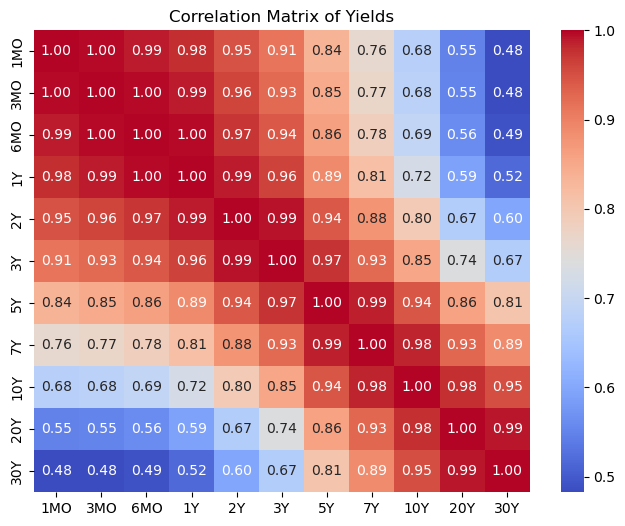

In [66]:
corr = df[TENORS].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix of Yields")
plt.show()

Correlations across maturities are above 0.95, suggesting strong comovement—ideal for dimensionality reduction.

                               mean       std
date  2013-09-22 01:12:48.379446784       NaN
1MO                        0.000059  0.062832
3MO                        0.000068  0.043966
6MO                        0.000051  0.036982
1Y                          0.00002  0.041337
2Y                        -0.000038  0.054651
3Y                        -0.000084  0.058146
5Y                        -0.000147  0.061137
7Y                        -0.000165  0.061446
10Y                       -0.000163  0.058295
20Y                       -0.000158  0.055563
30Y                       -0.000138  0.053842


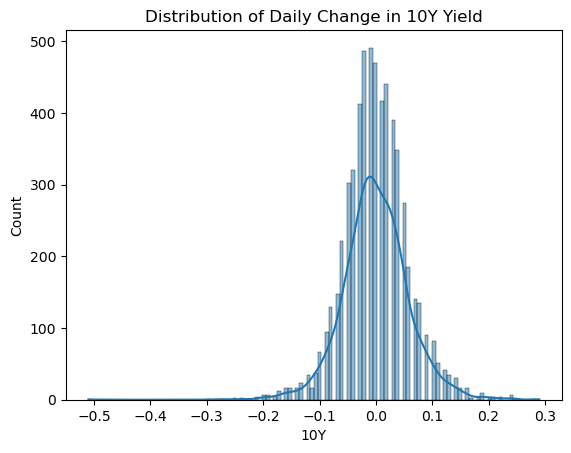

In [67]:
df_diff = pd.read_csv("../data/processed/cleaned_data_diffs.csv", parse_dates=['date'])
print(df_diff.describe().T[['mean','std']])


sns.histplot(df_diff['10Y'], kde=True)
plt.title("Distribution of Daily Change in 10Y Yield")
plt.show()

Daily changes appear to be stationary at 10Y based off of distributions. For summary statistics, differences centered around 0 which indicates likely stationarity for remaining maturities.

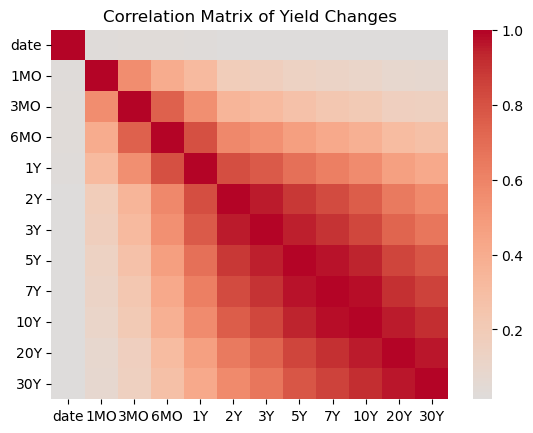

In [68]:
sns.heatmap(df_diff.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Yield Changes")
plt.show()

Strong positive correlation between nearby maturities demostrating yields tendencies to move together. As maturities distance, correlation diminishes.

In [69]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    return {'ADF Statistic': result[0], 'p-value': result[1]}

for t in ['1Y','5Y','10Y']:
    print(t, adf_test(df[t]))

1Y {'ADF Statistic': np.float64(-1.2674905351068926), 'p-value': np.float64(0.6439111393806385)}
5Y {'ADF Statistic': np.float64(-1.961807237096042), 'p-value': np.float64(0.303566163630481)}
10Y {'ADF Statistic': np.float64(-2.154012810538362), 'p-value': np.float64(0.2233572467360429)}


All maturities fail ADF test meaning that undifferenced rates are non-stationary over time period.

In [70]:
for t in ['1Y','5Y','10Y']:
    print(t, adf_test(df_diff[t]))

1Y {'ADF Statistic': np.float64(-10.860496115200583), 'p-value': np.float64(1.4505596839082685e-19)}
5Y {'ADF Statistic': np.float64(-58.56260569522048), 'p-value': 0.0}
10Y {'ADF Statistic': np.float64(-57.92148684675272), 'p-value': 0.0}


However, yields pass the ADF test when differences meaning that differences are stationary.

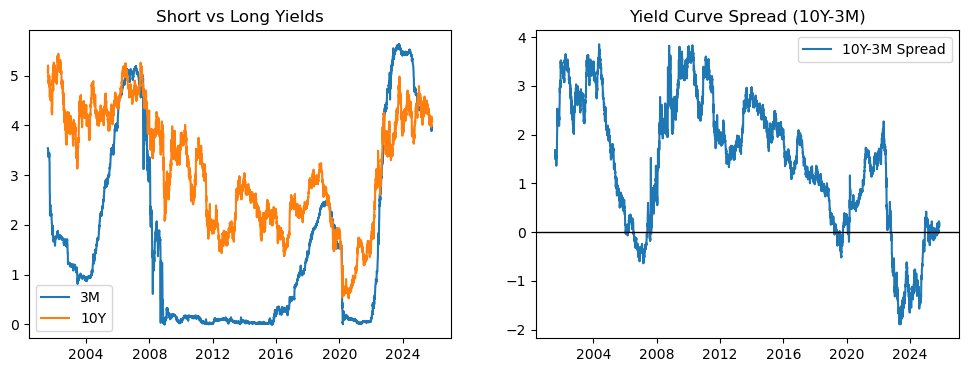

In [71]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(df.index, df['3MO'], label='3M')
ax[0].plot(df.index, df['10Y'], label='10Y')
ax[0].legend(); ax[0].set_title("Short vs Long Yields")
ax[1].plot(df.index, df['10Y'] - df['3MO'], label='10Y-3M Spread')
ax[1].axhline(0, color='k', lw=1)
ax[1].legend(); ax[1].set_title("Yield Curve Spread (10Y-3M)")
plt.show()

These results show:

1. Yields move together but short rates are more policy-sensitive.

2. Yield curve inversions align with tightening cycles and recessions.

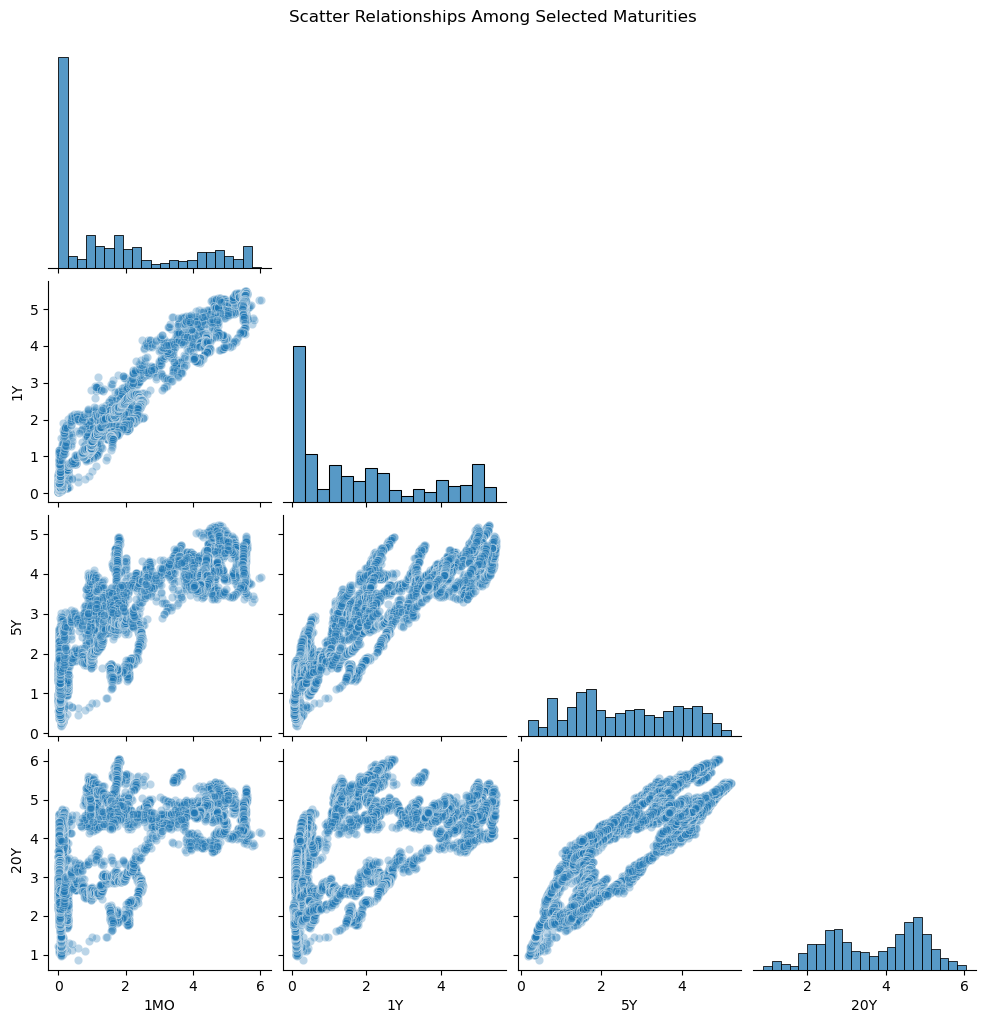

In [72]:
sns.pairplot(df[TENORS[::3]], corner=True, plot_kws={'alpha':0.3})
plt.suptitle("Scatter Relationships Among Selected Maturities", y=1.02)
plt.show()